In [16]:
# Data Preprocessing

In [17]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Step 2: Load Data
df = pd.read_csv("../../src/data/Video_Games_Sales_as_at_22_Dec_2016.csv")
df.head()  # View first few rows

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Step 3: Check Info
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [20]:
# Step 4: Check Missing Values
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [21]:
# Step 5: Drop rows with missing target (Global_Sales)
df = df.dropna(subset=["Global_Sales"])

In [22]:
# Step 6: Handle missing Year_of_Release - convert to int 
df = df.dropna(subset=["Year_of_Release"])
df["Year_of_Release"] = df["Year_of_Release"].astype(int)

In [23]:
# Clean User_Score (convert 'tbd' to NaN and then float)
df["User_Score"] = pd.to_numeric(df["User_Score"], errors='coerce')

In [24]:
# Fill missing scores/counts with median values
df["Critic_Score"].fillna(df["Critic_Score"].median(), inplace=True)
df["Critic_Count"].fillna(df["Critic_Count"].median(), inplace=True)
df["User_Score"].fillna(df["User_Score"].median(), inplace=True)
df["User_Count"].fillna(df["User_Count"].median(), inplace=True)

/tmp/ipykernel_13472/3831063624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Critic_Score"].fillna(df["Critic_Score"].median(), inplace=True)
/tmp/ipykernel_13472/3831063624.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [25]:
# Drop 'Developer' and 'Rating' if too many missing or high cardinality
df.drop(columns=["Developer"], inplace=True)
df.dropna(subset=["Rating"], inplace=True)

In [26]:
# Step 7: Feature Engineering
# Convert year to game age (2025 - Year_of_Release)
df["Game_Age"] = 2025 - df["Year_of_Release"]

In [28]:
# Step 8: Drop columns not useful for modeling
df = df.drop(columns=["Name", "Developer"])

KeyError: "['Developer'] not found in axis"

In [29]:
# Step 9: One-hot encode categorical variables
publisher_counts = df["Publisher"].value_counts()
rare_publishers = publisher_counts[publisher_counts < 50].index
df["Publisher"] = df["Publisher"].apply(lambda x: "Other" if x in rare_publishers else x)
df = pd.get_dummies(df, columns=["Platform", "Genre", "Publisher", "Rating"], drop_first=True)

In [30]:
# Step 10: Drop remaining rows with missing numeric values
df = df.dropna()

In [31]:
print(df.columns)

Index(['Name', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales',
       'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Game_Age', 'Platform_DC', 'Platform_DS',
       'Platform_GBA', 'Platform_GC', 'Platform_PC', 'Platform_PS',
       'Platform_PS2', 'Platform_PS3', 'Platform_PS4', 'Platform_PSP',
       'Platform_PSV', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XB', 'Platform_XOne', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Publisher_Acclaim Entertainment',
       'Publisher_Activision', 'Publisher_Atari',
       'Publisher_Bethesda Softworks', 'Publisher_Capcom',
       'Publisher_Codemasters', 'Publisher_D3Publisher',
       'Publisher_Deep Silver', 'Publisher_Disney Interactive Studios',
       'Publisher_Eidos Interactive', 'Publi

In [32]:
# Step 11: Save cleaned data
df.to_csv("../../src/data/processed/fc110570_cleaned_vgsales.csv", index=False)
print("Cleaned data saved!")

Cleaned data saved!


In [33]:
# Step 12: Exploratory Data Analysis

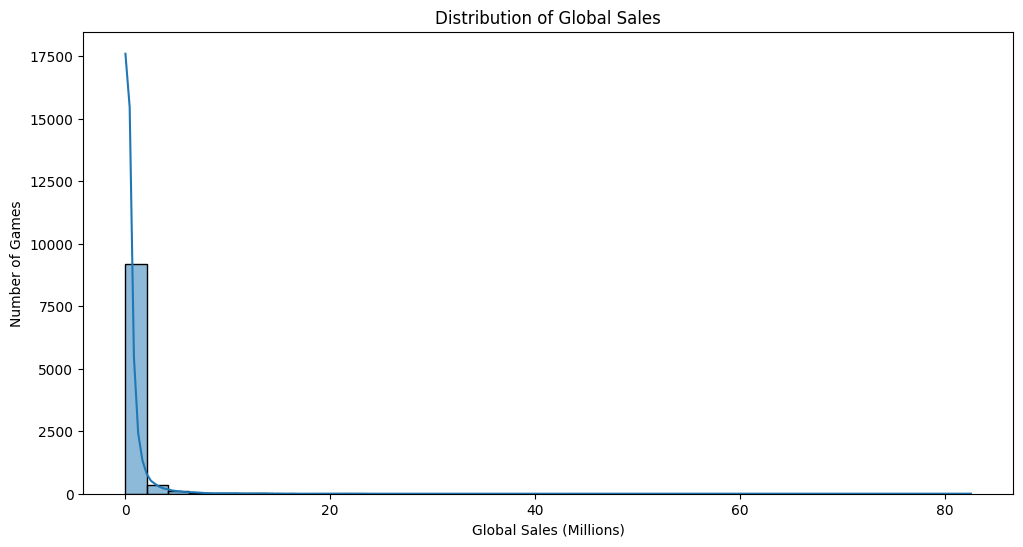

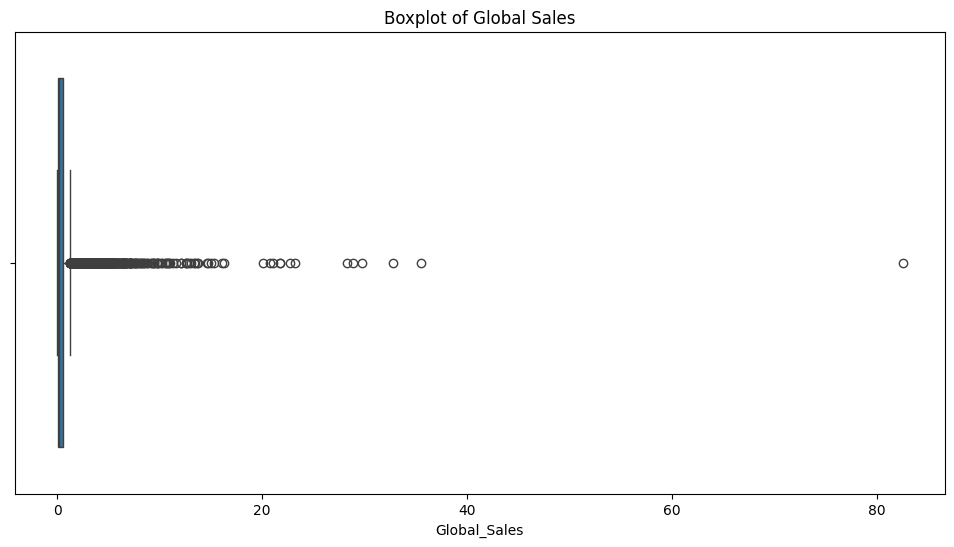

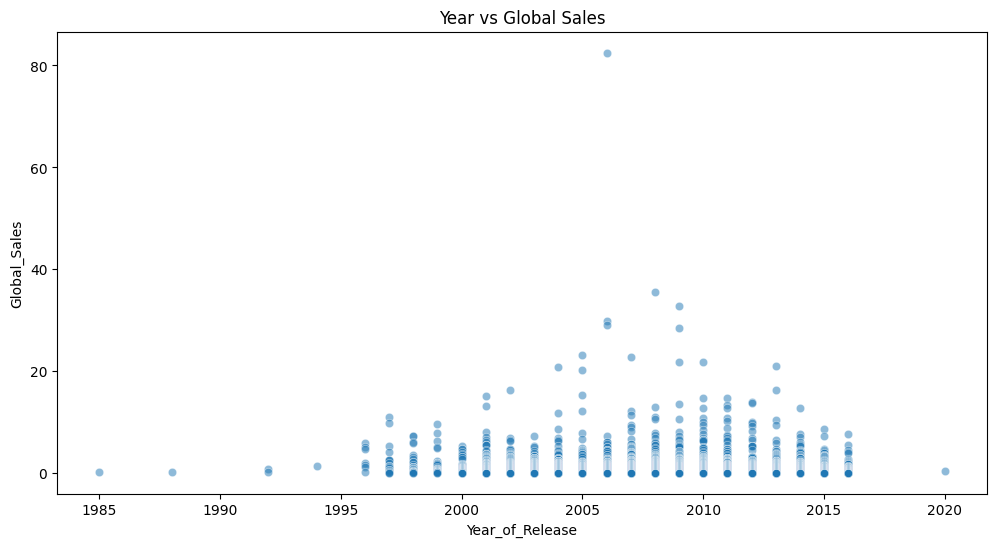

In [34]:
# 12.1: Distribution of Global Sales
plt.figure(figsize=(12,6))
sns.histplot(df["Global_Sales"], bins=40, kde=True)
plt.title("Distribution of Global Sales")
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Number of Games")
plt.show()



# Boxplot for Global Sales to check for outliers
plt.figure(figsize=(12,6))
sns.boxplot(x=df["Global_Sales"])
plt.title("Boxplot of Global Sales")
plt.show()



# Scatterplot for Global Sales vs Year
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="Year_of_Release", y="Global_Sales", alpha=0.5)
plt.title("Year vs Global Sales")
plt.show()

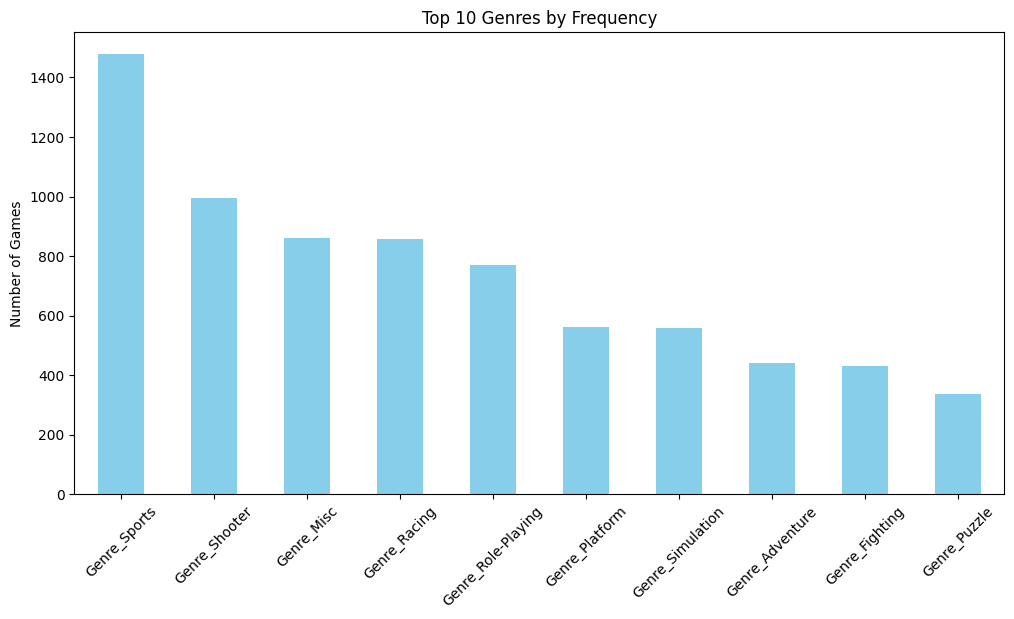

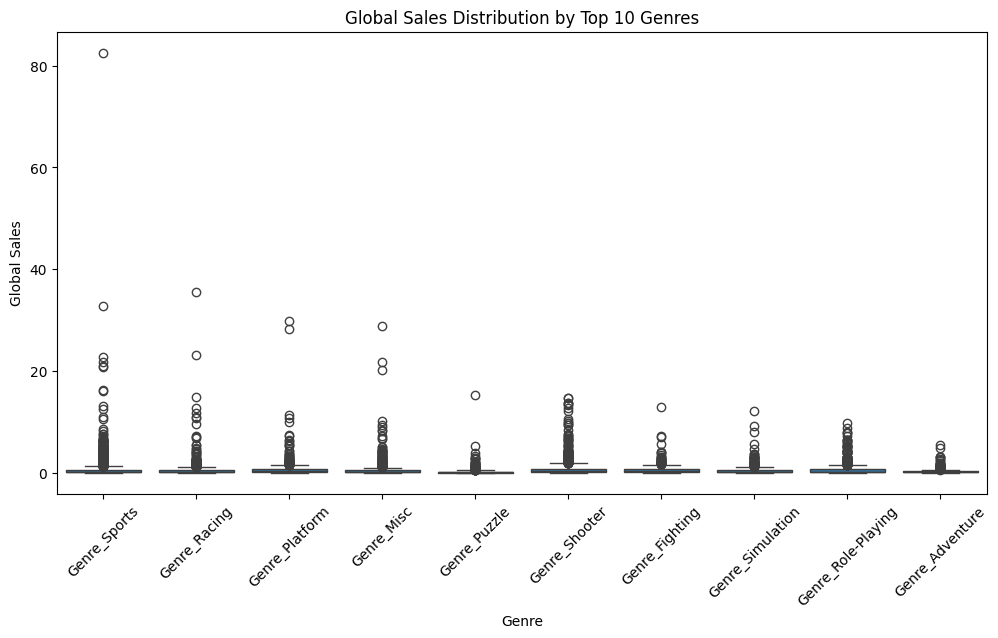

In [35]:
# 12.2: Global Sales by Genre (top 10)
plt.figure(figsize=(12,6))
top_genres = df.filter(like="Genre_").sum().sort_values(ascending=False)[:10]
top_genres.plot(kind="bar", color="skyblue")
plt.title("Top 10 Genres by Frequency")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()


# Boxplot of Global Sales by Genre (top 10 genres for clarity)
top_10_genres = df.filter(like="Genre_").sum().sort_values(ascending=False).index[:10]
genre_cols = [col for col in top_10_genres]
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x=df[genre_cols].idxmax(axis=1), y=df["Global_Sales"])
plt.title("Global Sales Distribution by Top 10 Genres")
plt.xlabel("Genre")
plt.ylabel("Global Sales")
plt.xticks(rotation=45)
plt.show()

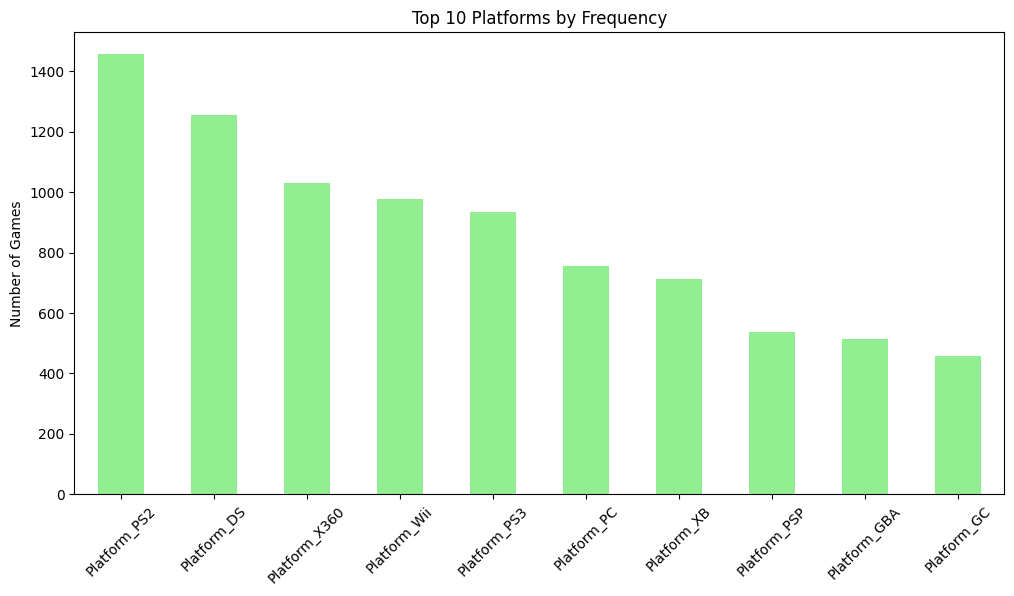

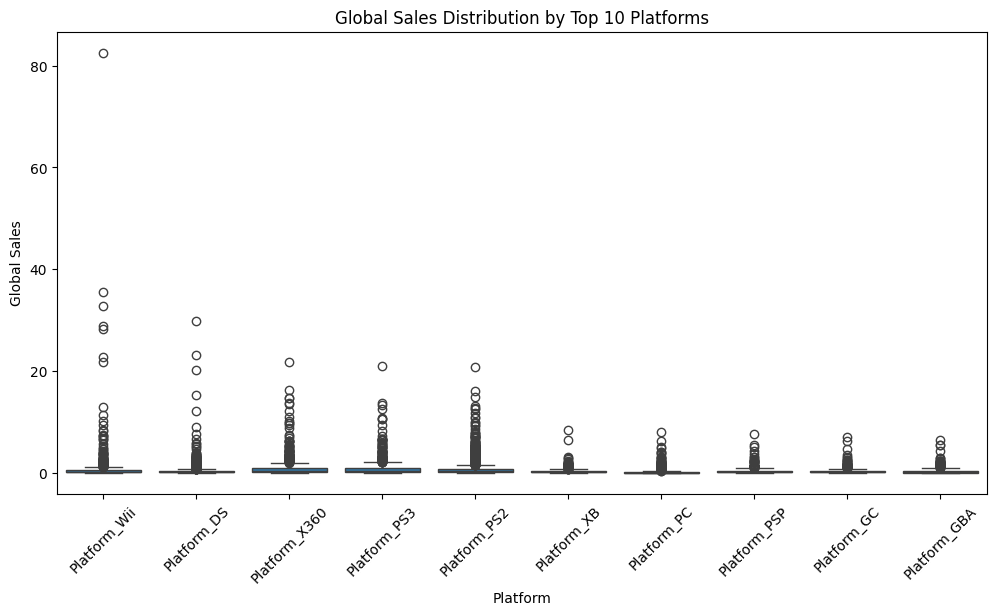

In [36]:
# 12.3: Global Sales by Platform (top 10)
plt.figure(figsize=(12,6))
top_platforms = df.filter(like="Platform_").sum().sort_values(ascending=False)[:10]
top_platforms.plot(kind="bar", color="lightgreen")
plt.title("Top 10 Platforms by Frequency")
plt.ylabel("Number of Games")
plt.xticks(rotation=45)
plt.show()


# Boxplot of Global Sales by Platform (top 10 platforms)
top_10_platforms = df.filter(like="Platform_").sum().sort_values(ascending=False).index[:10]
platform_cols = [col for col in top_10_platforms]
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x=df[platform_cols].idxmax(axis=1), y=df["Global_Sales"])
plt.title("Global Sales Distribution by Top 10 Platforms")
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.xticks(rotation=45)
plt.show()

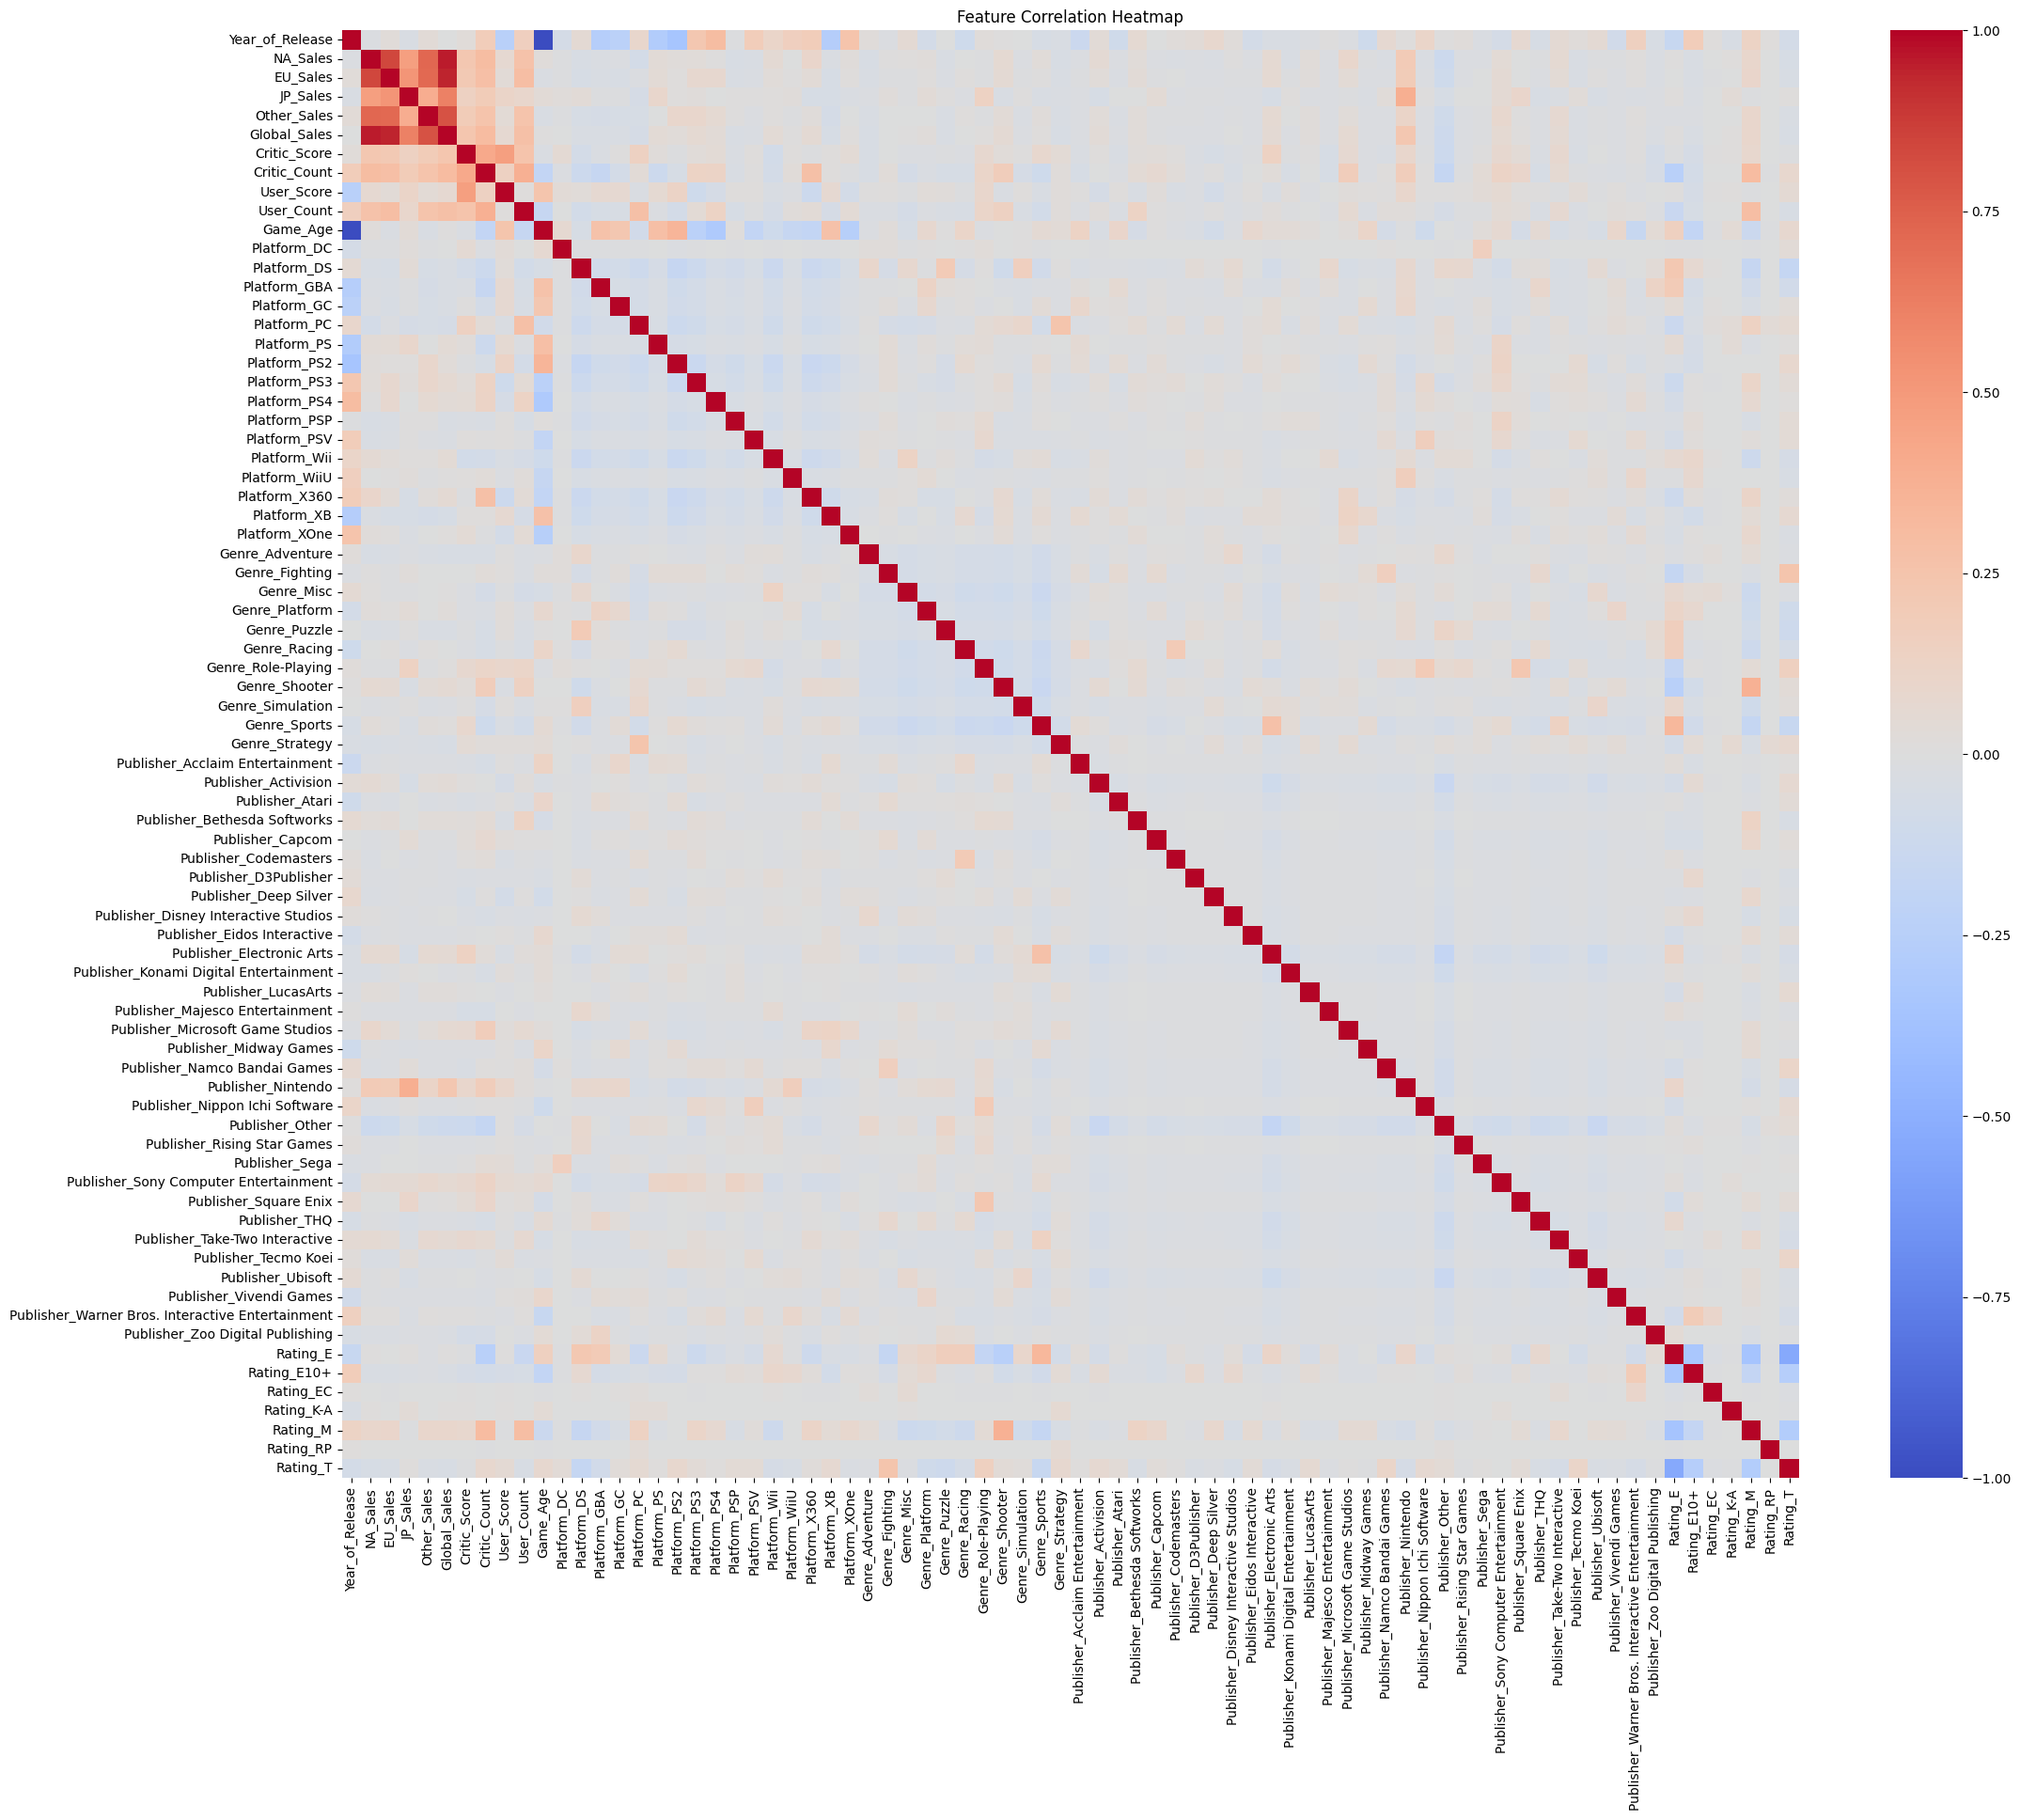

In [37]:
# 12.4: Correlation Heatmap
plt.figure(figsize=(25,20))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


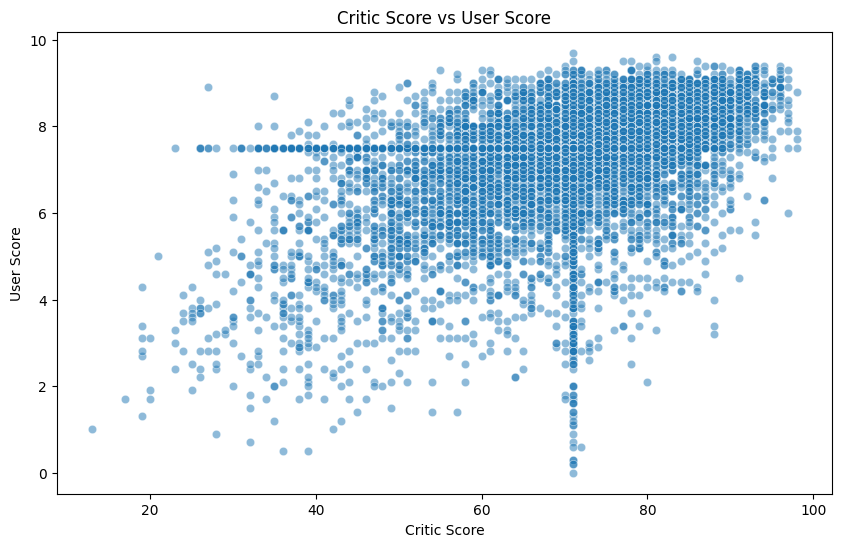

In [38]:
# 12.5: ( Additional:) Critic vs User Score Relationship
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Critic_Score", y="User_Score", alpha=0.5)
plt.title("Critic Score vs User Score")
plt.xlabel("Critic Score")
plt.ylabel("User Score")
plt.show()

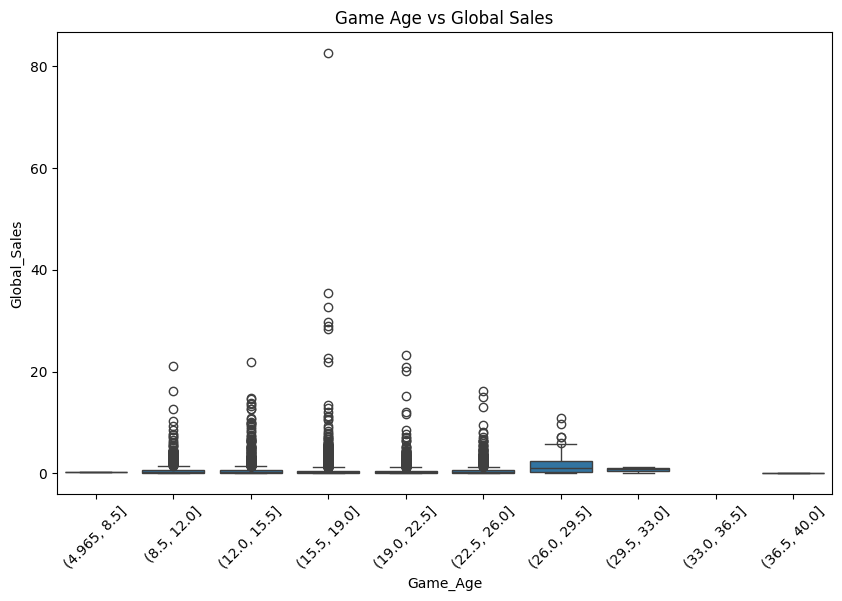

In [39]:
# 12.6: Game Age vs Global Sales
plt.figure(figsize=(10,6))
sns.boxplot(x=pd.cut(df["Game_Age"], bins=10), y=df["Global_Sales"])
plt.title("Game Age vs Global Sales")
plt.xticks(rotation=45)
plt.show()